>><font color='Orange'> __Practice at home__ </font>

Using the dataset __Boston__: <br>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
boston = pd.read_csv('Boston.csv')
data_boston = boston.iloc[:,:-1]
target_boston = boston.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_boston, 
                                                    target_boston, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                   )
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression().fit(X_train,y_train)
y_pred = lr.predict(X_val)

Create a second linear model named 'lin_model2' where you are going to mantain the regressors that are more correlated with the dependent variable. <br>
Don't forget that when dealing with regressors with high correlation, you should mantain only one of them (to avoid the problem of multicollinearity).

In [18]:
# join the X_train and y_train in one dataset named 'train' to plot the correlation between all variables
train = pd.concat([X_train,y_train], axis = 1)

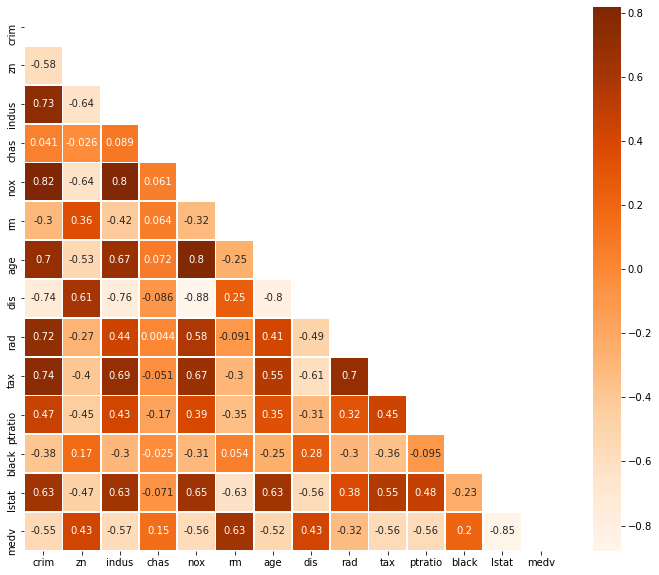

In [17]:
# plot the correlation matrix between all the variables (training set)
cor_spearman = train.corr(method='spearman')
plt.figure(figsize=(12,10))
mask = np.zeros_like(cor_spearman)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = cor_spearman,mask = mask, annot = True, cmap = plt.cm.Oranges, fmt='.2', linewidths=.8)
plt.show()

The only variable that is correlated with the dependent variable ('medv') , assuming a threshold of 0.7 is lstat. <br>
To build the model, let's consider all the variables that have a correlation higher than 0.5 : rm, ptratio and lstat.

In [33]:
# let's remove all the variables that we don't want to use to build the model
var_new = ['lstat','rm','ptratio']
X_train_new = X_train.loc[:,(X_train.columns.isin(var_new))]
X_val_new = X_val.loc[:,X_val.columns.isin(var_new)]

In [30]:
# build a second linear model named lin_model2.
lin_model2 = LinearRegression()

In [35]:
# fit the new data to the model lin_model2
lin_model2.fit(X_train_new,y_train)

LinearRegression()

In [44]:
# predict the values for X_val and named it as y_pred2
y_pred2 = lin_model2.predict(X_val_new)

In [73]:
# Compare the results between lin_model and lin_model2
# create an empty dataframe to present the results 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

r2 = r2_score(y_val, y_pred)
rw_ajust = 1 - ((1-r2_score(y_val, y_pred))*(len(y_pred)-1))/(len(y_pred)-1-len(X_train_new.columns))
mae =mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred, squared = True)
meDae = median_absolute_error(y_val, y_pred)
metrics_1 = pd.Series([r2,rw_ajust,mae,mse,meDae])

r2_pred2 = r2_score(y_val, y_pred2)
rw_ajst_pred2 = 1 - ((1-r2_score(y_val, y_pred2))*(len(y_pred2)-1))/(len(y_pred2)-1-len(X_train_new.columns))
mae_pred2 =mean_absolute_error(y_val, y_pred2)
mse_pred2 =mean_squared_error(y_val, y_pred2, squared = True)
meDae_pred2 = median_absolute_error(y_val, y_pred2)
metrics_2 = pd.Series([r2_pred2,rw_ajst_pred2,mae_pred2,mse_pred2,meDae_pred2])

metrics_df = pd.DataFrame([metrics_1,metrics_2])
metrics_df.rename(columns={0:'r^2 score', 1:'adj_r^2', 2:'mae', 3:'mse', 4:'medAE'})


,r^2 score,adj_r^2,mae,mse,medAE
0,0.692075,0.682649,3.686087,23.812245,2.820965
1,0.718916,0.710311,3.622166,21.736594,3.028719
